# 🧠 CORE-Bench Analysis & Insights

## Comprehensive Ordered Reasoning Evaluation Benchmark

This notebook analyzes the leaderboard results from CORE-Bench and generates publication-ready visualizations for:
- **Kaggle**: High-resolution PNG figures
- **GitHub**: SVG vector graphics for README
- **LinkedIn**: Optimized dimensions for social sharing

**Benchmark URL**: https://www.kaggle.com/benchmarks/taiwofeyijimi/core-bench

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from pathlib import Path

# Set style for publication-quality figures
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create output directories
os.makedirs('assets', exist_ok=True)
os.makedirs('assets/kaggle', exist_ok=True)
os.makedirs('assets/github', exist_ok=True)
os.makedirs('assets/linkedin', exist_ok=True)

# Configure matplotlib for high-quality output
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("✅ Libraries imported and output directories created")

✅ Libraries imported and output directories created


## 2. Load and Parse Leaderboard Data

In [2]:
# Load leaderboard data
with open('leaderboard.json', 'r') as f:
    leaderboard_data = json.load(f)

# Parse the leaderboard into a structured format
def parse_leaderboard(data):
    """Parse Kaggle Benchmarks leaderboard JSON into a DataFrame."""
    models = []
    
    for row in data['rows']:
        model_slug = row['modelVersionSlug']
        model_name = row['modelVersionName'] if row['modelVersionName'] else model_slug
        
        model_data = {
            'model_slug': model_slug,
            'model_name': model_name,
        }
        
        for task in row['taskResults']:
            task_name = task['benchmarkTaskName']
            result = task['result']
            
            # Extract result based on type
            if result.get('hasNumericResult'):
                model_data[task_name] = result['numericResult']['value']
                model_data[f'{task_name}_type'] = 'numeric'
            elif result.get('hasBooleanResult'):
                model_data[task_name] = result['booleanResult']
                model_data[f'{task_name}_type'] = 'boolean'
            else:
                model_data[task_name] = None
                model_data[f'{task_name}_type'] = 'pending'
        
        models.append(model_data)
    
    return pd.DataFrame(models)

df = parse_leaderboard(leaderboard_data)

# Clean up model names for display
model_name_map = {
    'gemini-2.5-pro': 'Gemini 2.5 Pro',
    'gemini-3-pro-preview': 'Gemini 3 Pro Preview',
    'claude-haiku-4-5-20251001': 'Claude Haiku 4.5',
    'gemini-3-flash-preview': 'Gemini 3 Flash Preview',
    'deepseek-v3.2': 'DeepSeek V3.2',
    'qwen3-next-80b-a3b-thinking': 'Qwen 3 Next 80B'
}

df['model_display'] = df['model_slug'].map(model_name_map)
print(f"✅ Loaded {len(df)} models from leaderboard")
df[['model_display', 'comprehensive_reasoning_benchmark', 'logical_deduction', 'math_word_problems', 
    'causal_reasoning', 'analogical_reasoning', 'multi_step_planning', 'reasoning_quality_evaluation']]

✅ Loaded 6 models from leaderboard


,model_display,comprehensive_reasoning_benchmark,logical_deduction,math_word_problems,causal_reasoning,analogical_reasoning,multi_step_planning,reasoning_quality_evaluation
0,Gemini 2.5 Pro,NaN,None,None,None,None,None,None
1,Gemini 3 Pro Preview,0.960784,True,True,True,True,True,False
2,Claude Haiku 4.5,0.941176,True,True,True,True,False,True
3,Gemini 3 Flash Preview,0.960784,True,True,True,True,True,True
4,DeepSeek V3.2,0.960784,True,True,True,True,True,False
5,Qwen 3 Next 80B,0.960784,True,True,True,True,True,True


## 3. Data Preparation and Summary Statistics

In [3]:
# Prepare data for visualization
# Filter out models with pending results
df_complete = df[df['comprehensive_reasoning_benchmark'].notna()].copy()

# Task columns
task_cols = ['logical_deduction', 'math_word_problems', 'causal_reasoning', 
             'analogical_reasoning', 'multi_step_planning', 'reasoning_quality_evaluation']

task_display_names = {
    'logical_deduction': 'Logical Deduction',
    'math_word_problems': 'Math Reasoning',
    'causal_reasoning': 'Causal Reasoning',
    'analogical_reasoning': 'Analogical Reasoning',
    'multi_step_planning': 'Multi-Step Planning',
    'reasoning_quality_evaluation': 'Quality Evaluation'
}

# Create summary statistics
print("=" * 60)
print("📊 CORE-BENCH LEADERBOARD SUMMARY")
print("=" * 60)
print(f"\n🏆 Total Models Evaluated: {len(df_complete)}")
print(f"📈 Top Score: {df_complete['comprehensive_reasoning_benchmark'].max():.2%}")
print(f"📉 Lowest Score: {df_complete['comprehensive_reasoning_benchmark'].min():.2%}")
print(f"📊 Mean Score: {df_complete['comprehensive_reasoning_benchmark'].mean():.2%}")
print(f"📏 Std Dev: {df_complete['comprehensive_reasoning_benchmark'].std():.2%}")

# Task pass rates
print("\n" + "-" * 60)
print("✅ TASK PASS RATES")
print("-" * 60)
for task in task_cols:
    pass_rate = df_complete[task].mean() if df_complete[task].dtype == bool else "N/A"
    if isinstance(pass_rate, float):
        print(f"  • {task_display_names[task]}: {pass_rate:.0%}")
    else:
        print(f"  • {task_display_names[task]}: {pass_rate}")

📊 CORE-BENCH LEADERBOARD SUMMARY

🏆 Total Models Evaluated: 5
📈 Top Score: 96.08%
📉 Lowest Score: 94.12%
📊 Mean Score: 95.69%
📏 Std Dev: 0.88%

------------------------------------------------------------
✅ TASK PASS RATES
------------------------------------------------------------
  • Logical Deduction: N/A
  • Math Reasoning: N/A
  • Causal Reasoning: N/A
  • Analogical Reasoning: N/A
  • Multi-Step Planning: N/A
  • Quality Evaluation: N/A


## 4. Visualization 1: Comprehensive Score Comparison

A horizontal bar chart comparing overall reasoning scores across models.

C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3676669720.py:39: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3676669720.py:42: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.savefig('assets/kaggle/performance_comparison.png', dpi=300, bbox_inches='tight',
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3676669720.py:44: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.savefig('assets/github/performance_comparison.svg', format='svg', bbox_inches='tight',


✅ Performance comparison chart saved!


C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3676669720.py:59: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3676669720.py:60: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig_linkedin.savefig('assets/linkedin/performance_comparison.png', dpi=100, bbox_inches='tight',
c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


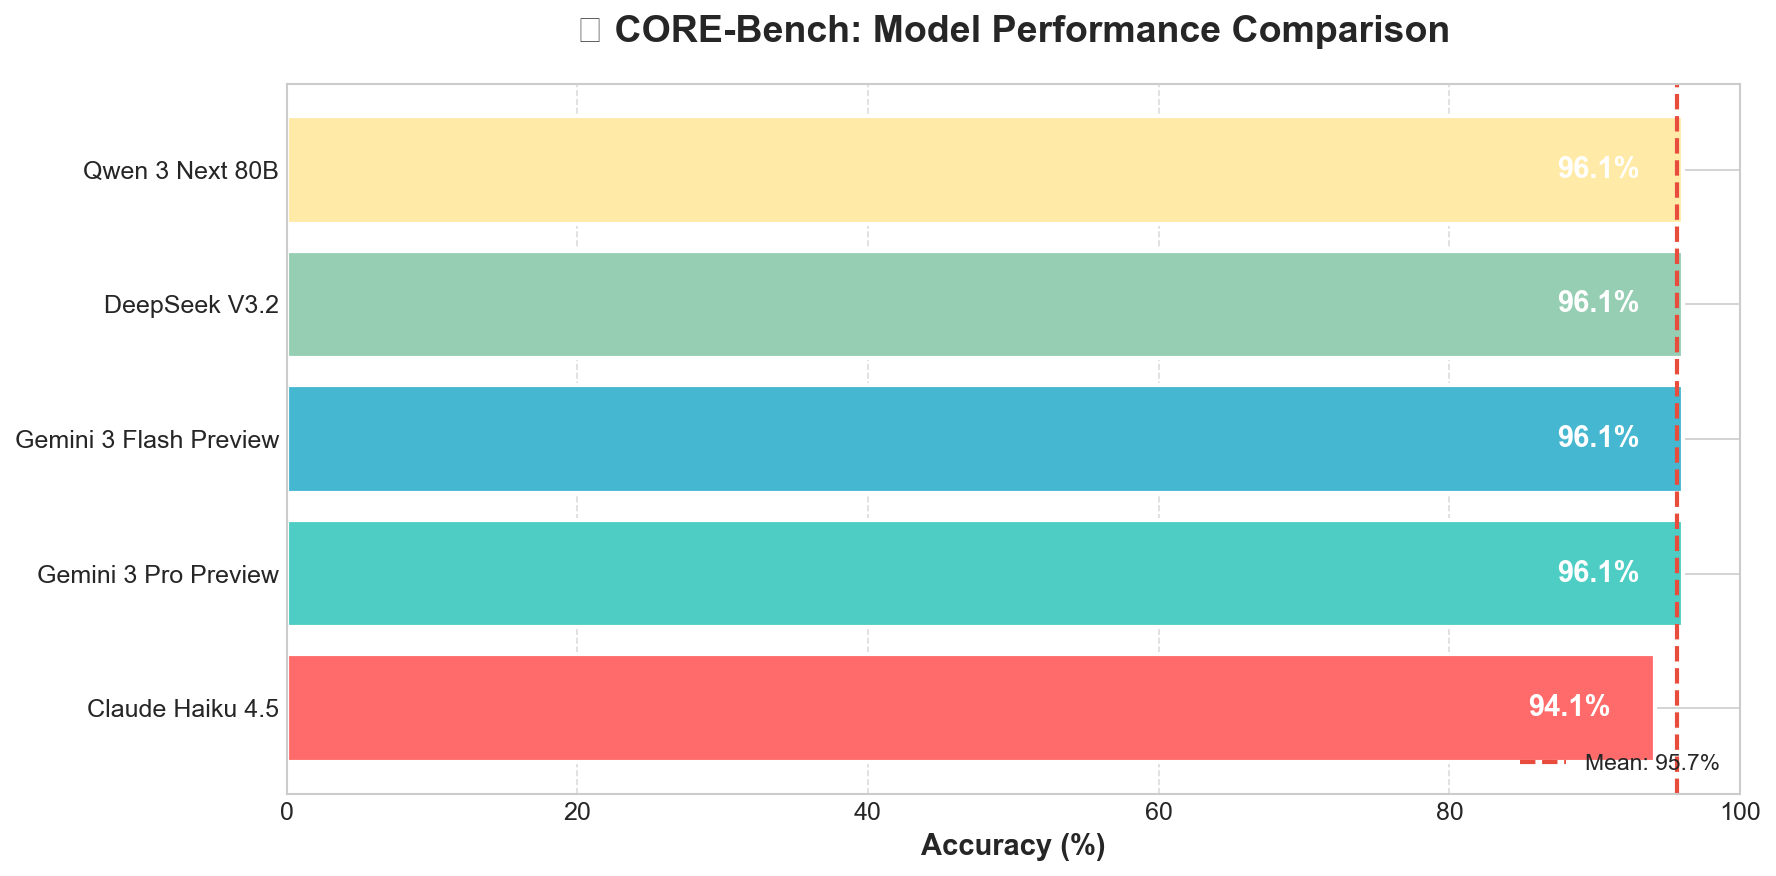

In [4]:
# Sort by score for visualization
df_sorted = df_complete.sort_values('comprehensive_reasoning_benchmark', ascending=True)

# Color palette
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

fig, ax = plt.subplots(figsize=(12, 6))

# Create horizontal bar chart
bars = ax.barh(df_sorted['model_display'], 
               df_sorted['comprehensive_reasoning_benchmark'] * 100,
               color=colors[:len(df_sorted)],
               edgecolor='white',
               linewidth=2)

# Add value labels on bars
for bar, score in zip(bars, df_sorted['comprehensive_reasoning_benchmark']):
    width = bar.get_width()
    ax.text(width - 3, bar.get_y() + bar.get_height()/2,
            f'{score:.1%}',
            ha='right', va='center',
            fontsize=14, fontweight='bold', color='white')

# Styling
ax.set_xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_title('🧠 CORE-Bench: Model Performance Comparison', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlim(0, 100)

# Add grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Add vertical line at mean
mean_score = df_sorted['comprehensive_reasoning_benchmark'].mean() * 100
ax.axvline(x=mean_score, color='#E74C3C', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.1f}%')
ax.legend(loc='lower right', fontsize=11)

plt.tight_layout()

# Save for different platforms
fig.savefig('assets/kaggle/performance_comparison.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
fig.savefig('assets/github/performance_comparison.svg', format='svg', bbox_inches='tight',
            facecolor='white', edgecolor='none')

# LinkedIn optimized (1200x627)
fig_linkedin, ax_linkedin = plt.subplots(figsize=(12, 6.27))
bars = ax_linkedin.barh(df_sorted['model_display'], 
                        df_sorted['comprehensive_reasoning_benchmark'] * 100,
                        color=colors[:len(df_sorted)], edgecolor='white', linewidth=2)
for bar, score in zip(bars, df_sorted['comprehensive_reasoning_benchmark']):
    ax_linkedin.text(bar.get_width() - 3, bar.get_y() + bar.get_height()/2,
                     f'{score:.1%}', ha='right', va='center', fontsize=14, fontweight='bold', color='white')
ax_linkedin.set_xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax_linkedin.set_title('🧠 CORE-Bench: LLM Reasoning Benchmark Results', fontsize=18, fontweight='bold', pad=20)
ax_linkedin.set_xlim(0, 100)
ax_linkedin.xaxis.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
fig_linkedin.savefig('assets/linkedin/performance_comparison.png', dpi=100, bbox_inches='tight',
                     facecolor='white', edgecolor='none')
plt.close(fig_linkedin)

print("✅ Performance comparison chart saved!")
plt.show()

## 5. Visualization 2: Task-by-Task Heatmap

Shows pass/fail status for each model across all 6 reasoning tasks.

C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3182543012.py:45: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3182543012.py:45: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3182543012.py:45: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3182543012.py:48: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.savefig('assets/kaggle/task_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3182543012.py:48: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.savefig('assets/kaggle/task_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
C:\Users\17067\AppData\Local\

✅ Task heatmap saved!


C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3182543012.py:50: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.savefig('assets/linkedin/task_heatmap.png', dpi=100, bbox_inches='tight', facecolor='white')
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3182543012.py:50: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.savefig('assets/linkedin/task_heatmap.png', dpi=100, bbox_inches='tight', facecolor='white')
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3182543012.py:50: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.savefig('assets/linkedin/task_heatmap.png', dpi=100, bbox_inches='tight', facecolor='white')
c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\

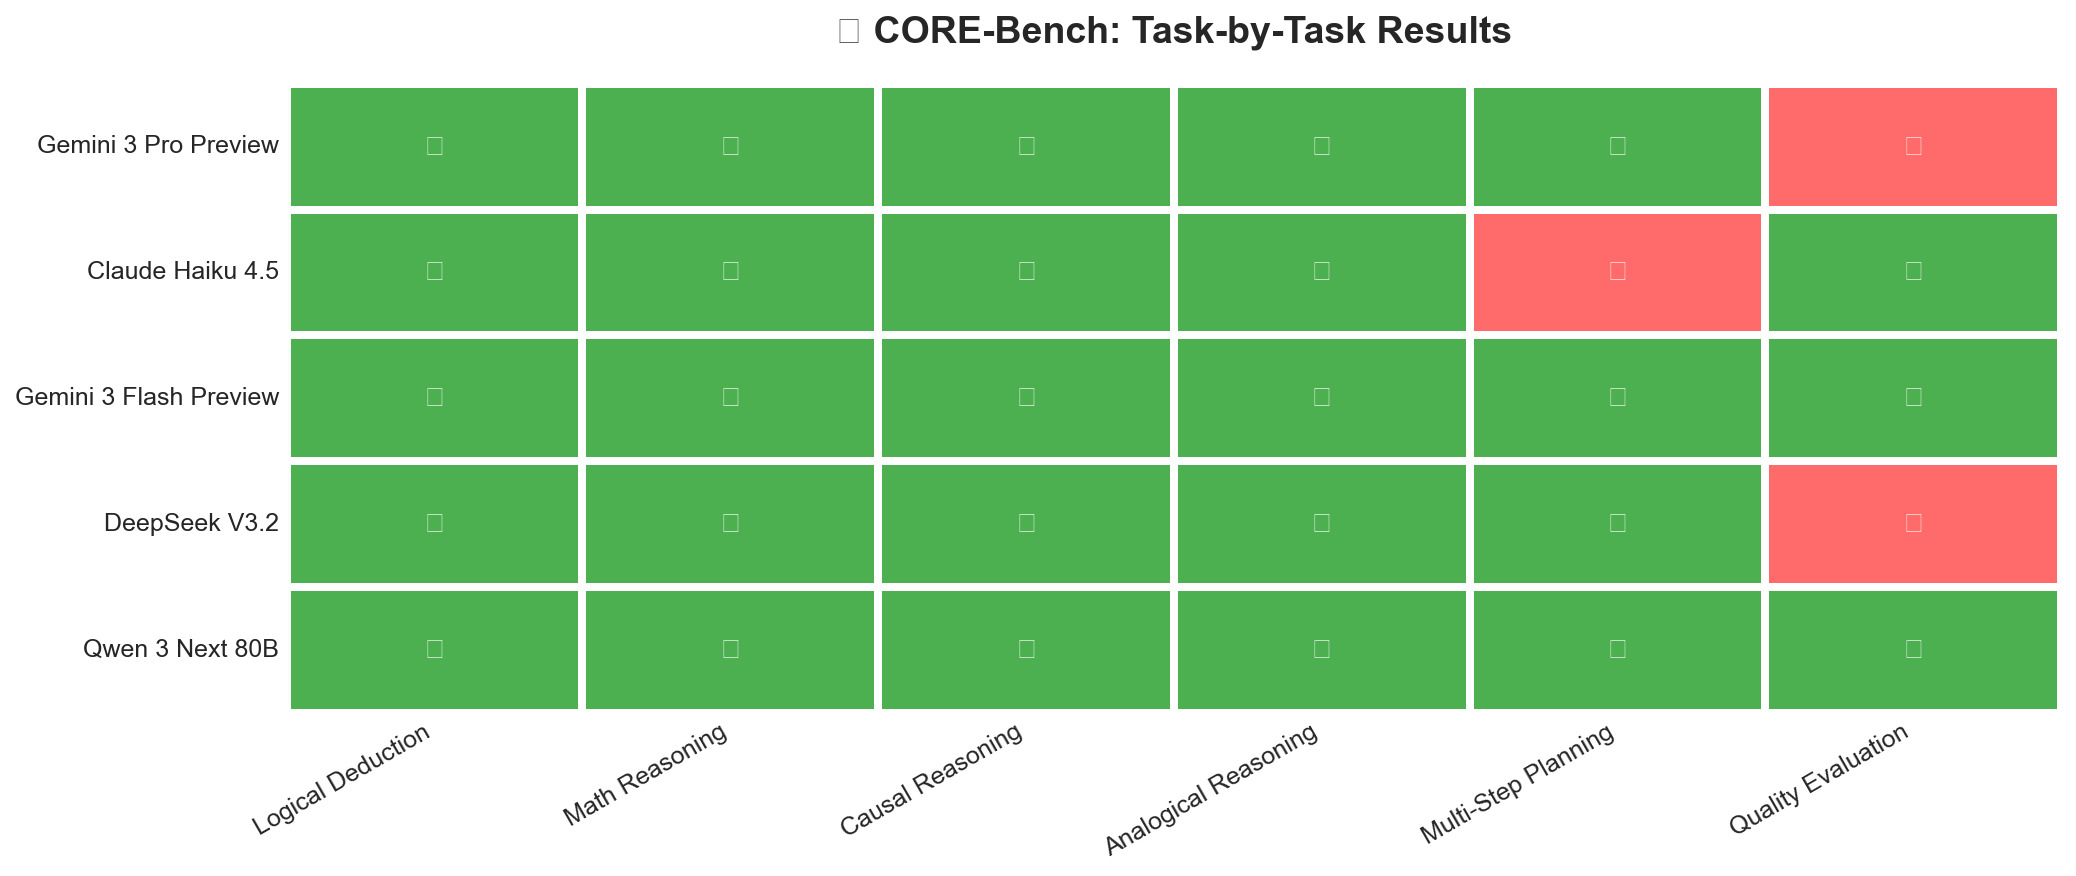

In [5]:
# Create heatmap data
heatmap_data = df_complete[['model_display'] + task_cols].copy()
heatmap_data = heatmap_data.set_index('model_display')

# Convert boolean to numeric (1 = pass, 0 = fail)
for col in task_cols:
    heatmap_data[col] = heatmap_data[col].astype(float)

# Rename columns for display
heatmap_data.columns = [task_display_names[c] for c in heatmap_data.columns]

# Create heatmap
fig, ax = plt.subplots(figsize=(14, 6))

# Custom colormap: red for fail, green for pass
cmap = sns.diverging_palette(10, 130, as_cmap=True)

sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.0f',
            cmap=['#FF6B6B', '#4CAF50'],
            cbar=False,
            linewidths=3,
            linecolor='white',
            ax=ax,
            annot_kws={'size': 14, 'weight': 'bold'})

# Replace 0/1 with ❌/✅ symbols
for text in ax.texts:
    if text.get_text() == '1':
        text.set_text('✅')
        text.set_color('white')
    elif text.get_text() == '0':
        text.set_text('❌')
        text.set_color('white')

ax.set_title('🎯 CORE-Bench: Task-by-Task Results', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('')
ax.set_ylabel('')

# Rotate x labels
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

# Save
fig.savefig('assets/kaggle/task_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
fig.savefig('assets/github/task_heatmap.svg', format='svg', bbox_inches='tight', facecolor='white')
fig.savefig('assets/linkedin/task_heatmap.png', dpi=100, bbox_inches='tight', facecolor='white')

print("✅ Task heatmap saved!")
plt.show()

## 6. Visualization 3: Radar Chart - Model Capabilities

A radar/spider chart showing each model's capabilities across the 6 reasoning dimensions.

C:\Users\17067\AppData\Local\Temp\ipykernel_41608\1137868259.py:39: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\1137868259.py:42: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.savefig('assets/kaggle/radar_chart.png', dpi=300, bbox_inches='tight', facecolor='white')
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\1137868259.py:43: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.savefig('assets/github/radar_chart.svg', format='svg', bbox_inches='tight', facecolor='white')
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\1137868259.py:44: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.savefig('assets/linkedin/radar_chart.png', dpi=100, bbox_inches='tight', facecolor='white')
c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12

✅ Radar chart saved!


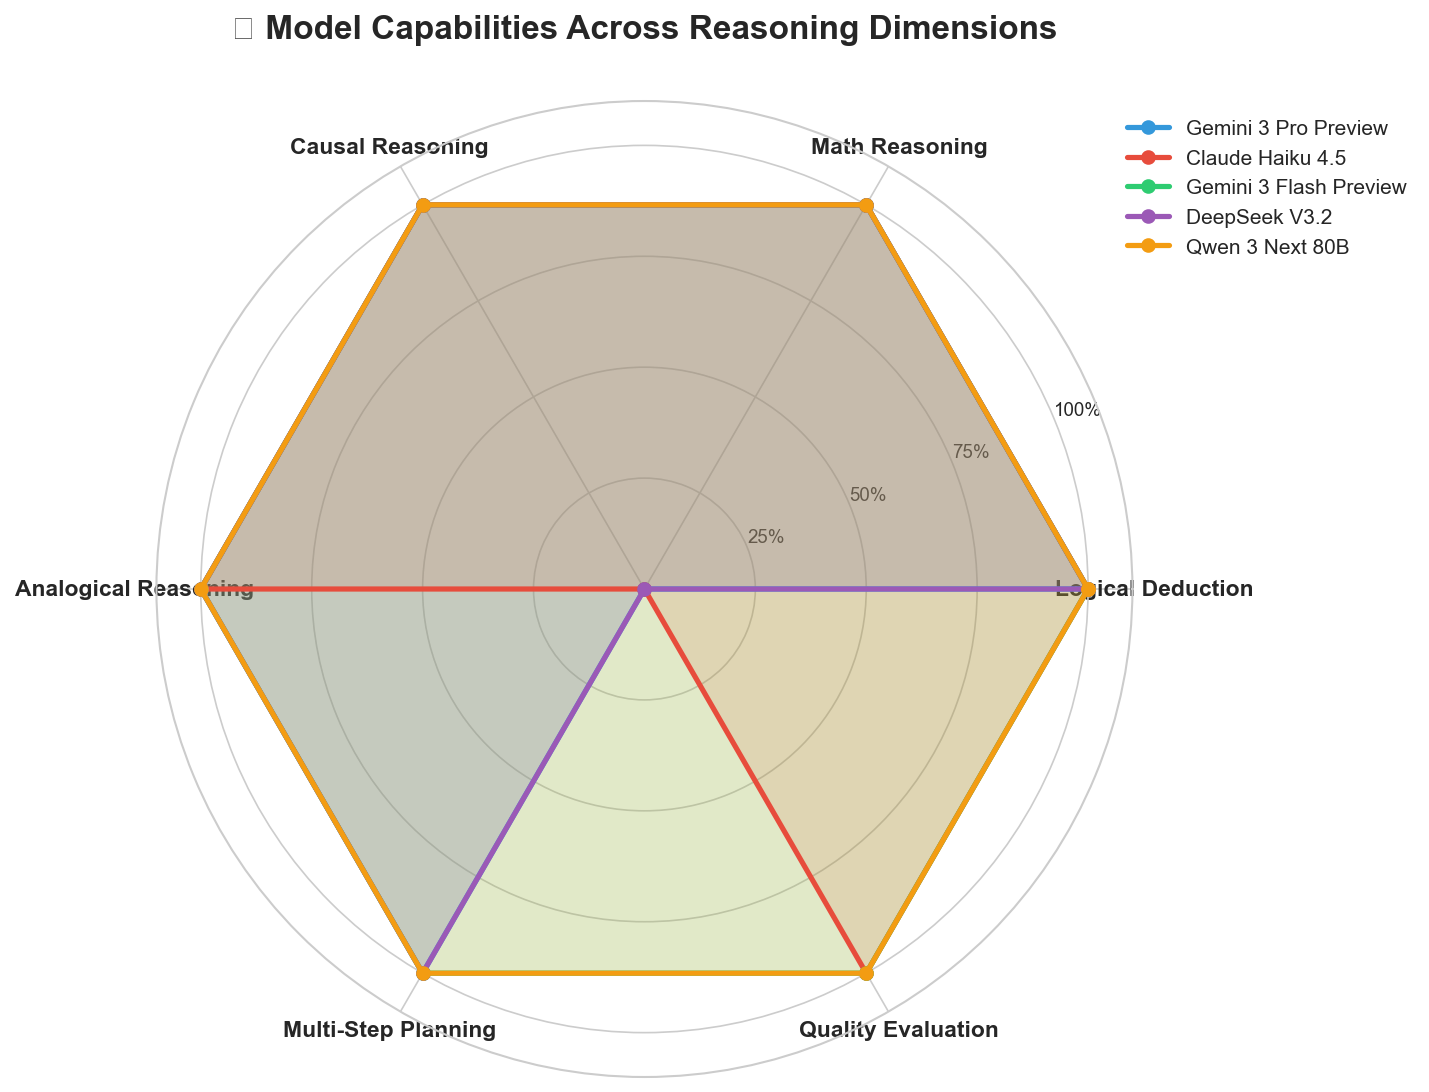

In [6]:
# Radar chart
from math import pi

# Categories for radar
categories = list(task_display_names.values())
N = len(categories)

# Create angles for radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Color palette for models
model_colors = ['#3498DB', '#E74C3C', '#2ECC71', '#9B59B6', '#F39C12']

for idx, (_, row) in enumerate(df_complete.iterrows()):
    values = [float(row[task]) for task in task_cols]
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2.5, 
            label=row['model_display'], color=model_colors[idx % len(model_colors)])
    ax.fill(angles, values, alpha=0.15, color=model_colors[idx % len(model_colors)])

# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11, fontweight='bold')

# Set radial limits
ax.set_ylim(0, 1.1)
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['25%', '50%', '75%', '100%'], size=9)

# Title and legend
ax.set_title('🎯 Model Capabilities Across Reasoning Dimensions', 
             size=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=10)

plt.tight_layout()

# Save
fig.savefig('assets/kaggle/radar_chart.png', dpi=300, bbox_inches='tight', facecolor='white')
fig.savefig('assets/github/radar_chart.svg', format='svg', bbox_inches='tight', facecolor='white')
fig.savefig('assets/linkedin/radar_chart.png', dpi=100, bbox_inches='tight', facecolor='white')

print("✅ Radar chart saved!")
plt.show()

## 7. Visualization 4: Problem Distribution Pie Chart

Shows the distribution of 51 problems across the 4 reasoning categories.

C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3109503585.py:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3109503585.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.savefig('assets/kaggle/problem_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3109503585.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.savefig('assets/github/problem_distribution.svg', format='svg', bbox_inches='tight', facecolor='white')


✅ Problem distribution chart saved!


C:\Users\17067\AppData\Local\Temp\ipykernel_41608\3109503585.py:39: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.savefig('assets/linkedin/problem_distribution.png', dpi=100, bbox_inches='tight', facecolor='white')
c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


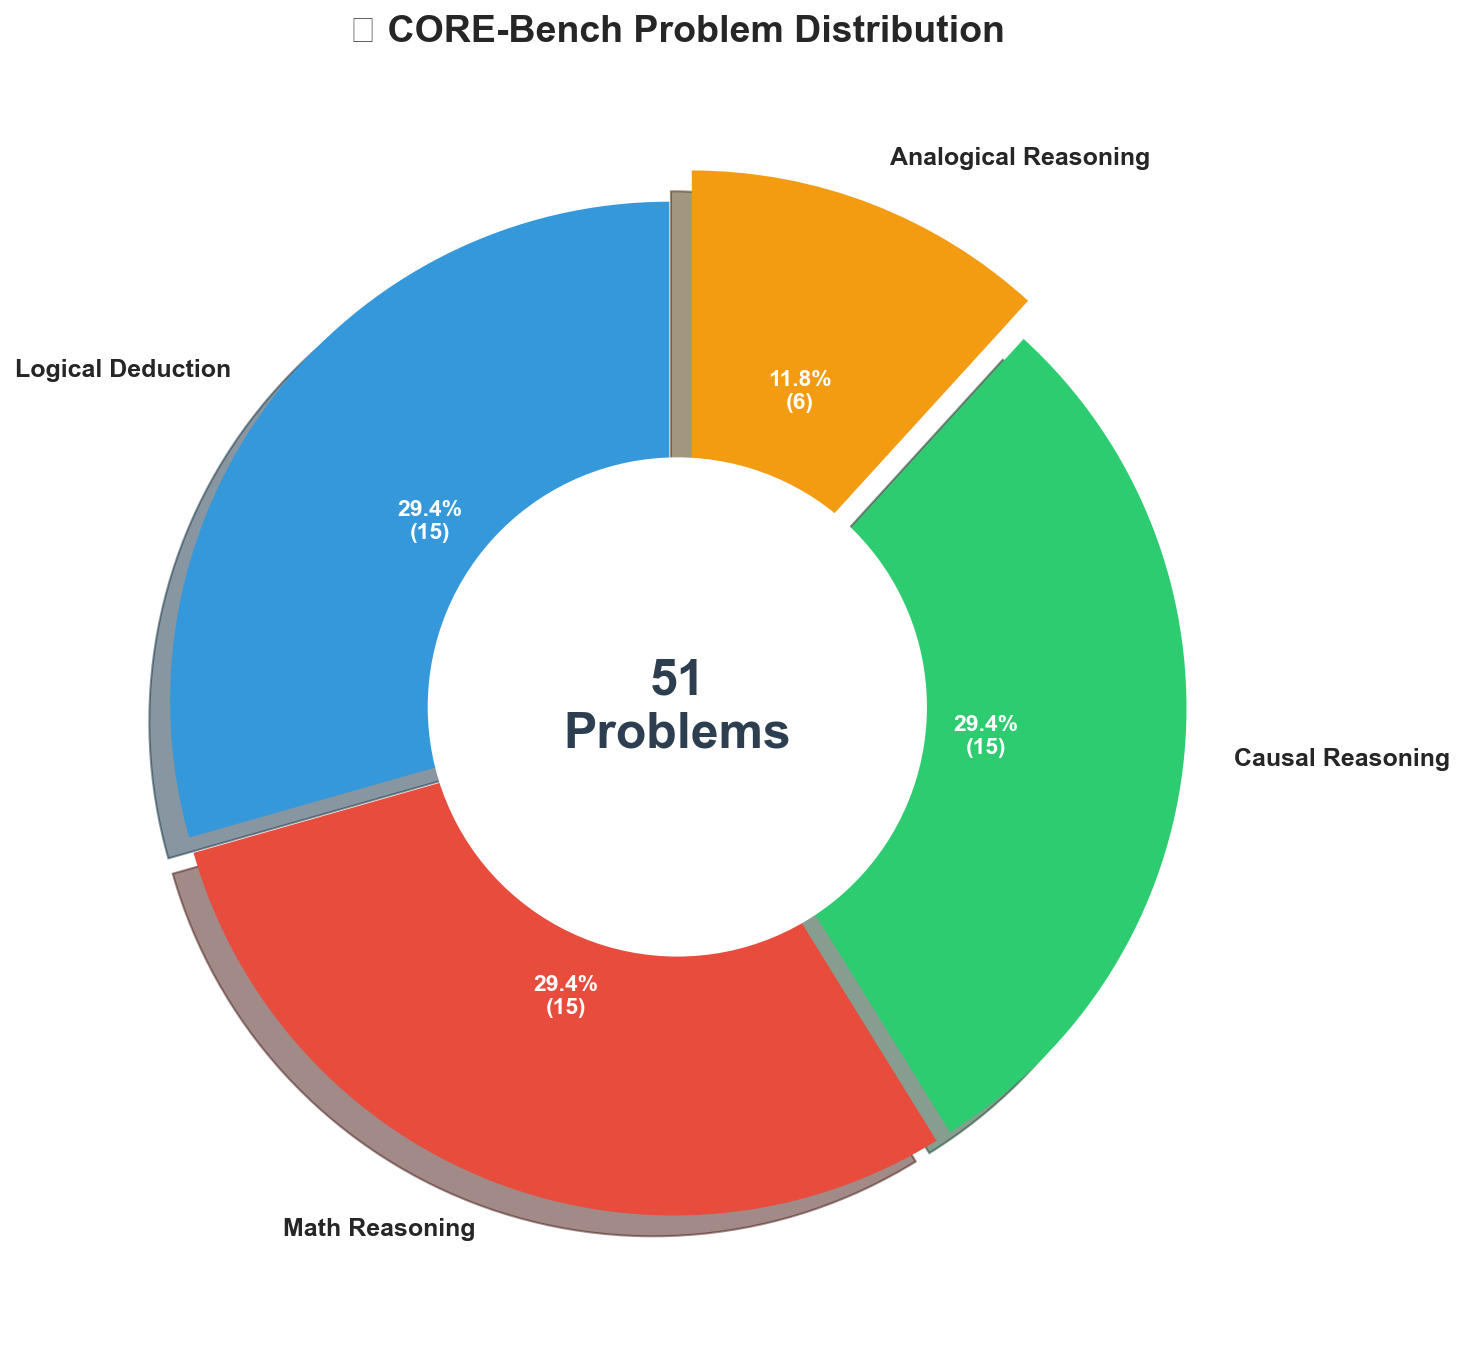

In [7]:
# Problem distribution
categories = ['Logical Deduction', 'Math Reasoning', 'Causal Reasoning', 'Analogical Reasoning']
problem_counts = [15, 15, 15, 6]
colors = ['#3498DB', '#E74C3C', '#2ECC71', '#F39C12']
explode = (0.02, 0.02, 0.02, 0.08)  # Slightly explode the smallest slice

fig, ax = plt.subplots(figsize=(10, 10))

wedges, texts, autotexts = ax.pie(problem_counts, 
                                   labels=categories,
                                   autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(problem_counts))})',
                                   colors=colors,
                                   explode=explode,
                                   shadow=True,
                                   startangle=90,
                                   textprops={'fontsize': 12, 'fontweight': 'bold'})

# Style autopct
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Add center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
ax.add_patch(centre_circle)

# Add total in center
ax.text(0, 0, f'51\nProblems', ha='center', va='center', 
        fontsize=24, fontweight='bold', color='#2C3E50')

ax.set_title('📊 CORE-Bench Problem Distribution', fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()

# Save
fig.savefig('assets/kaggle/problem_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
fig.savefig('assets/github/problem_distribution.svg', format='svg', bbox_inches='tight', facecolor='white')
fig.savefig('assets/linkedin/problem_distribution.png', dpi=100, bbox_inches='tight', facecolor='white')

print("✅ Problem distribution chart saved!")
plt.show()

## 8. Visualization 5: Combined Dashboard Figure

A comprehensive single-image summary perfect for social media sharing.

c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\1734833276.py:60: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\1734833276.py:60: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\17067\AppData\Local\Temp\ipykernel_41608\1734833276.py:60: UserWarn

✅ Combined dashboard saved!


c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\17067\Documents\Creating Kaggle Benchmark\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserW

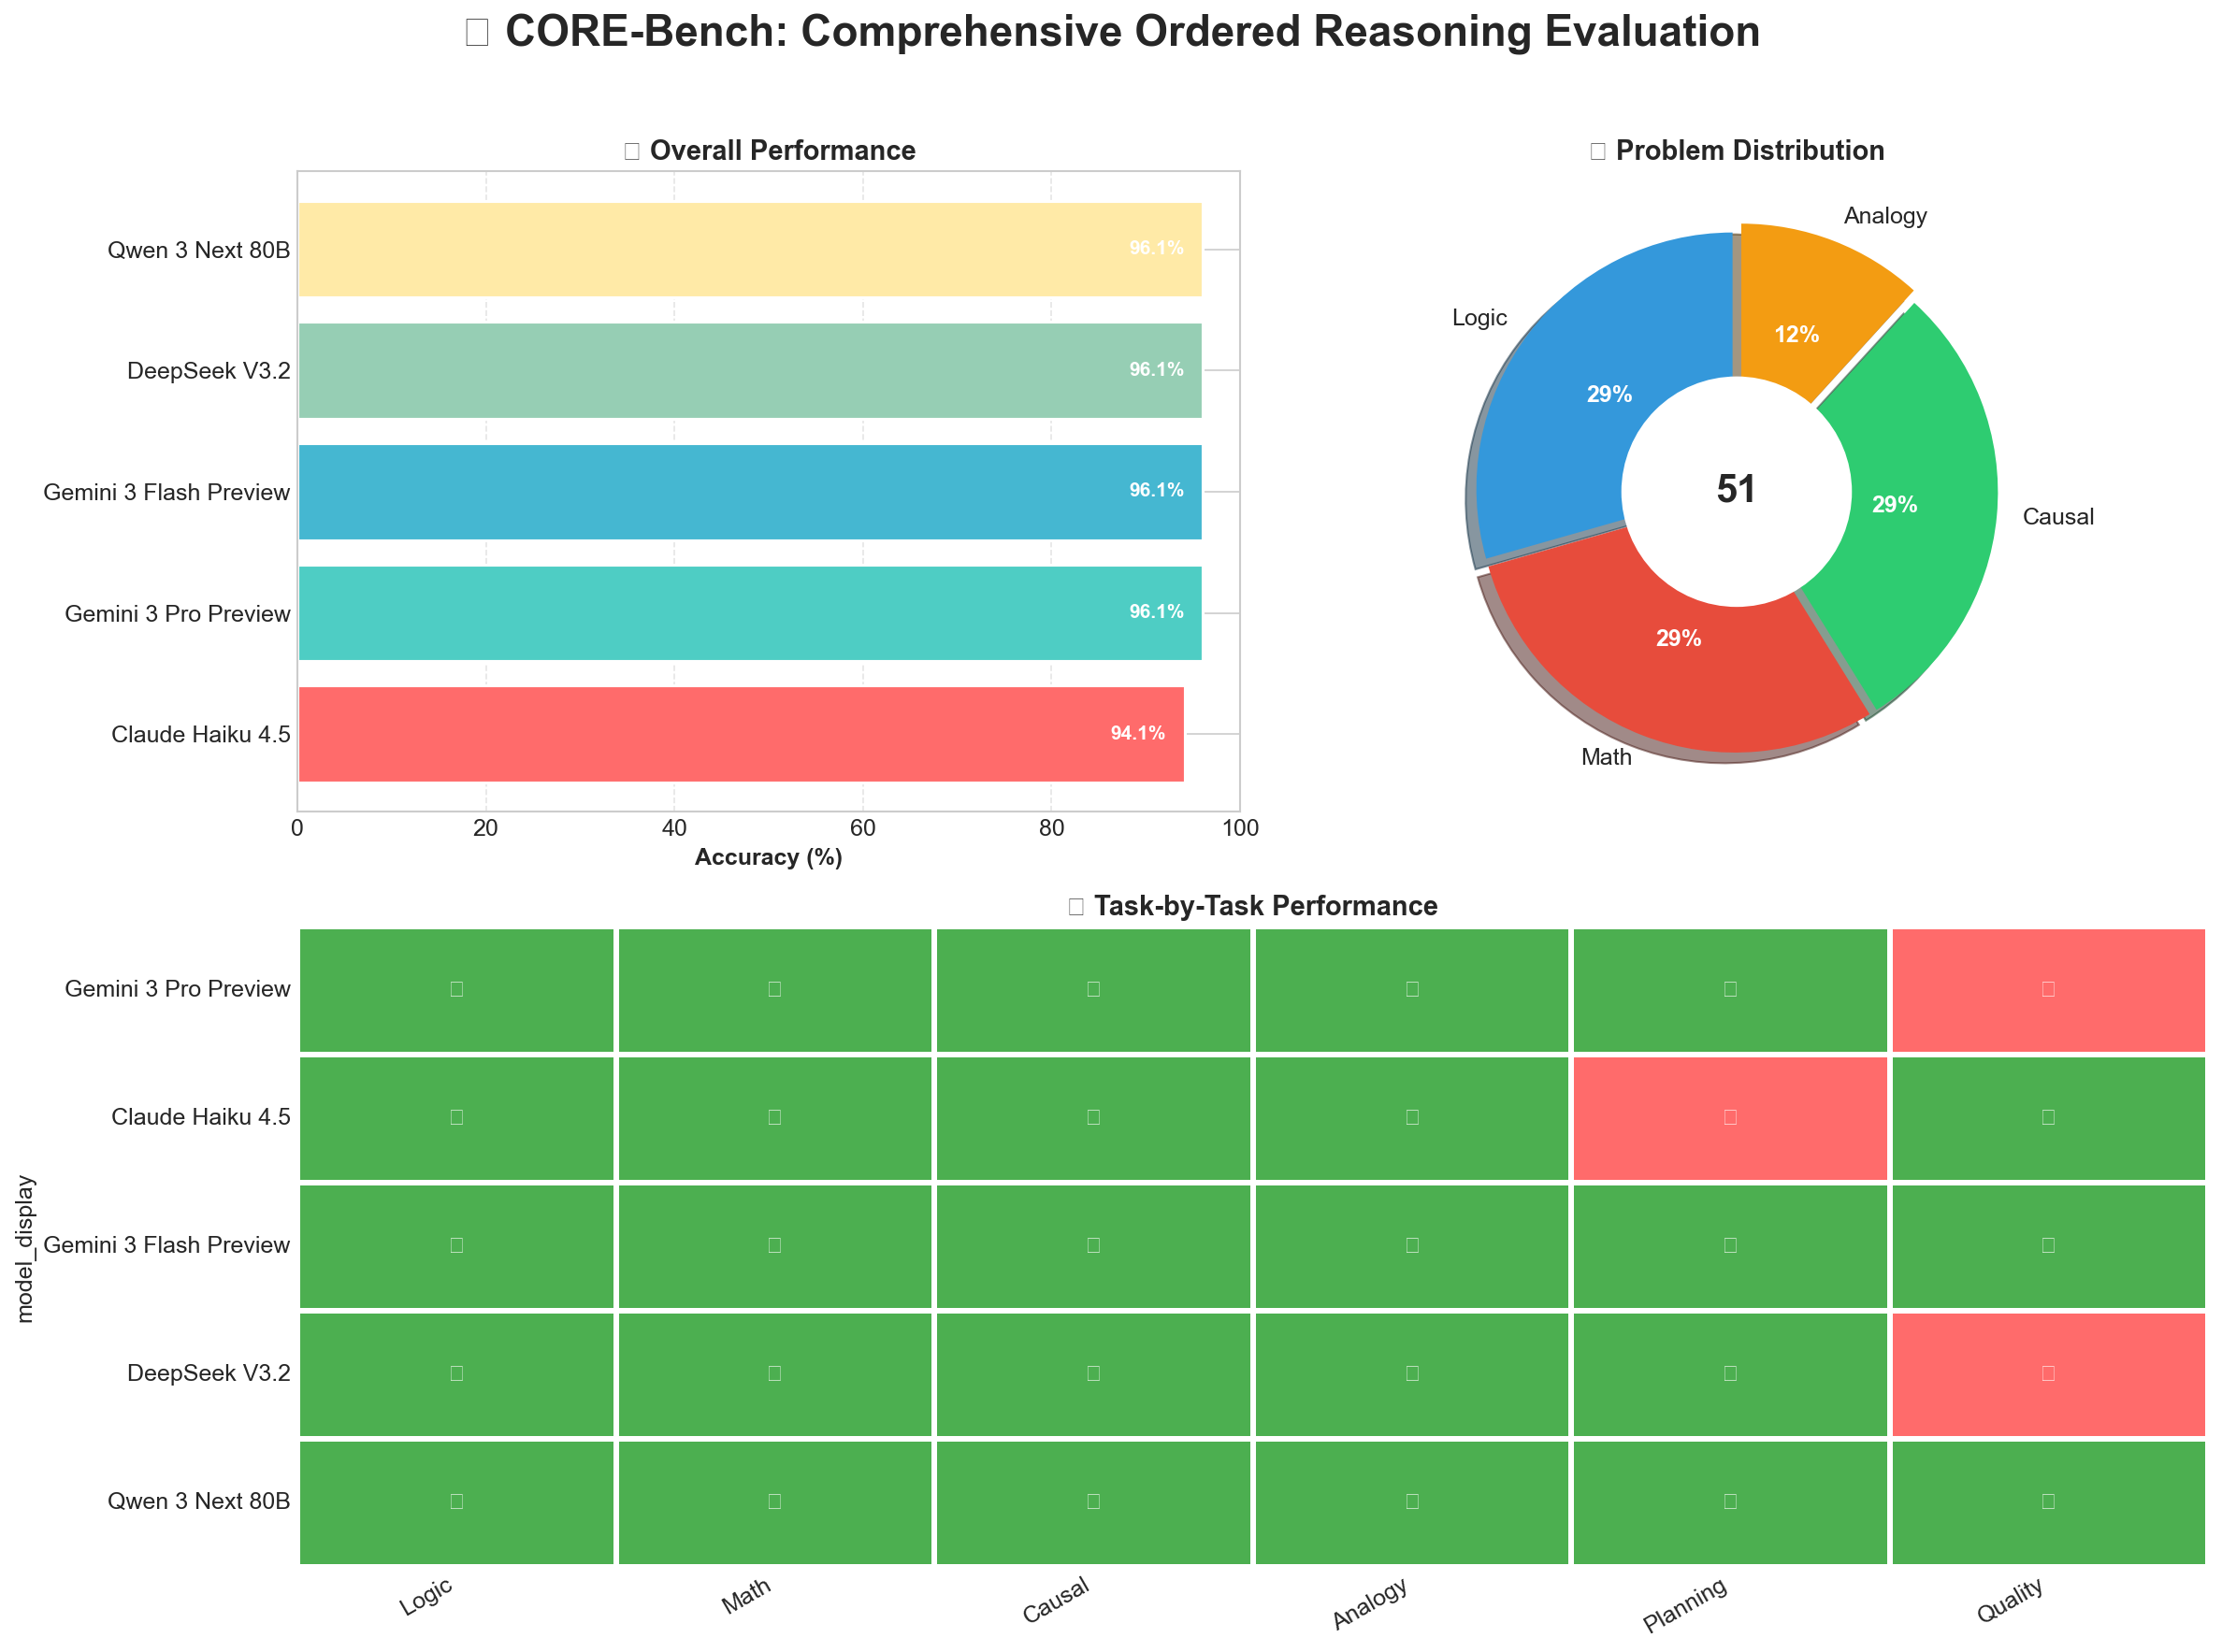

In [8]:
# Create combined dashboard
fig = plt.figure(figsize=(16, 12))

# Title
fig.suptitle('🧠 CORE-Bench: Comprehensive Ordered Reasoning Evaluation', 
             fontsize=22, fontweight='bold', y=0.98)

# Subplot 1: Bar chart (top left)
ax1 = fig.add_subplot(2, 2, 1)
df_sorted = df_complete.sort_values('comprehensive_reasoning_benchmark', ascending=True)
bars = ax1.barh(df_sorted['model_display'], 
                df_sorted['comprehensive_reasoning_benchmark'] * 100,
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'][:len(df_sorted)],
                edgecolor='white', linewidth=1.5)
for bar, score in zip(bars, df_sorted['comprehensive_reasoning_benchmark']):
    ax1.text(bar.get_width() - 2, bar.get_y() + bar.get_height()/2,
             f'{score:.1%}', ha='right', va='center', fontsize=10, fontweight='bold', color='white')
ax1.set_xlabel('Accuracy (%)', fontweight='bold')
ax1.set_title('📊 Overall Performance', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 100)
ax1.xaxis.grid(True, linestyle='--', alpha=0.5)

# Subplot 2: Pie chart (top right)
ax2 = fig.add_subplot(2, 2, 2)
wedges, texts, autotexts = ax2.pie([15, 15, 15, 6], 
                                    labels=['Logic', 'Math', 'Causal', 'Analogy'],
                                    autopct='%1.0f%%',
                                    colors=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12'],
                                    explode=(0.02, 0.02, 0.02, 0.05),
                                    shadow=True, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
ax2.add_patch(centre_circle)
ax2.text(0, 0, '51', ha='center', va='center', fontsize=20, fontweight='bold')
ax2.set_title('📋 Problem Distribution', fontsize=14, fontweight='bold')

# Subplot 3: Heatmap (bottom, spanning both columns)
ax3 = fig.add_subplot(2, 1, 2)
heatmap_data = df_complete[['model_display'] + task_cols].copy()
heatmap_data = heatmap_data.set_index('model_display')
for col in task_cols:
    heatmap_data[col] = heatmap_data[col].astype(float)
heatmap_data.columns = ['Logic', 'Math', 'Causal', 'Analogy', 'Planning', 'Quality']

sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap=['#FF6B6B', '#4CAF50'],
            cbar=False, linewidths=2, linecolor='white', ax=ax3,
            annot_kws={'size': 12, 'weight': 'bold'})
for text in ax3.texts:
    if text.get_text() == '1':
        text.set_text('✅')
        text.set_color('white')
    elif text.get_text() == '0':
        text.set_text('❌')
        text.set_color('white')
ax3.set_title('🎯 Task-by-Task Performance', fontsize=14, fontweight='bold')
plt.xticks(rotation=30, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save dashboard
fig.savefig('assets/kaggle/core_bench_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
fig.savefig('assets/github/core_bench_dashboard.svg', format='svg', bbox_inches='tight', facecolor='white')
fig.savefig('assets/linkedin/core_bench_dashboard.png', dpi=100, bbox_inches='tight', facecolor='white')

# Also save as main assets
fig.savefig('assets/core_bench_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')

print("✅ Combined dashboard saved!")
plt.show()

## 9. Key Insights and Analysis

In [9]:
# Generate comprehensive insights
print("=" * 70)
print("🔍 CORE-BENCH KEY INSIGHTS")
print("=" * 70)

# Insight 1: Top performers
top_score = df_complete['comprehensive_reasoning_benchmark'].max()
top_models = df_complete[df_complete['comprehensive_reasoning_benchmark'] == top_score]['model_display'].tolist()
print(f"\n🏆 TOP PERFORMERS ({top_score:.1%} accuracy):")
for model in top_models:
    print(f"   • {model}")

# Insight 2: Score distribution
print(f"\n📊 SCORE DISTRIBUTION:")
print(f"   • Range: {df_complete['comprehensive_reasoning_benchmark'].min():.1%} - {df_complete['comprehensive_reasoning_benchmark'].max():.1%}")
print(f"   • Mean: {df_complete['comprehensive_reasoning_benchmark'].mean():.1%}")
print(f"   • Gap between top and bottom: {(top_score - df_complete['comprehensive_reasoning_benchmark'].min())*100:.1f} percentage points")

# Insight 3: Hardest tasks
print(f"\n🎯 TASK DIFFICULTY ANALYSIS:")
for task in task_cols:
    pass_count = df_complete[task].sum()
    total = len(df_complete)
    pass_rate = pass_count / total
    status = "🟢 Easy" if pass_rate == 1.0 else "🟡 Medium" if pass_rate >= 0.6 else "🔴 Hard"
    print(f"   • {task_display_names[task]}: {pass_rate:.0%} pass rate {status}")

# Insight 4: Model weaknesses
print(f"\n⚠️ MODEL-SPECIFIC WEAKNESSES:")
for _, row in df_complete.iterrows():
    failures = [task_display_names[t] for t in task_cols if not row[t]]
    if failures:
        print(f"   • {row['model_display']}: Failed {', '.join(failures)}")
    else:
        print(f"   • {row['model_display']}: ✅ All tasks passed")

# Insight 5: Recommendations
print(f"\n💡 RECOMMENDATIONS FOR BENCHMARK IMPROVEMENT:")
all_pass_tasks = [t for t in task_cols if df_complete[t].all()]
if all_pass_tasks:
    print(f"   • Add harder problems to: {', '.join([task_display_names[t] for t in all_pass_tasks])}")
print(f"   • Consider adding: Spatial reasoning, temporal reasoning, multi-hop inference")
print(f"   • Expand analogical reasoning (currently only 6 problems)")

print("\n" + "=" * 70)

🔍 CORE-BENCH KEY INSIGHTS

🏆 TOP PERFORMERS (96.1% accuracy):
   • Gemini 3 Pro Preview
   • Gemini 3 Flash Preview
   • DeepSeek V3.2
   • Qwen 3 Next 80B

📊 SCORE DISTRIBUTION:
   • Range: 94.1% - 96.1%
   • Mean: 95.7%
   • Gap between top and bottom: 2.0 percentage points

🎯 TASK DIFFICULTY ANALYSIS:
   • Logical Deduction: 100% pass rate 🟢 Easy
   • Math Reasoning: 100% pass rate 🟢 Easy
   • Causal Reasoning: 100% pass rate 🟢 Easy
   • Analogical Reasoning: 100% pass rate 🟢 Easy
   • Multi-Step Planning: 80% pass rate 🟡 Medium
   • Quality Evaluation: 60% pass rate 🟡 Medium

⚠️ MODEL-SPECIFIC WEAKNESSES:
   • Gemini 3 Pro Preview: Failed Quality Evaluation
   • Claude Haiku 4.5: Failed Multi-Step Planning
   • Gemini 3 Flash Preview: ✅ All tasks passed
   • DeepSeek V3.2: Failed Quality Evaluation
   • Qwen 3 Next 80B: ✅ All tasks passed

💡 RECOMMENDATIONS FOR BENCHMARK IMPROVEMENT:
   • Add harder problems to: Logical Deduction, Math Reasoning, Causal Reasoning, Analogical Reason

## 10. Generate LinkedIn Post Content

In [10]:
# Generate LinkedIn post
linkedin_post = f"""
🧠 Excited to share CORE-Bench - my new LLM reasoning benchmark on Kaggle!

I created a Comprehensive Ordered Reasoning Evaluation (CORE) benchmark to test how well AI models really think.

📊 THE RESULTS ARE IN:

🥇 Top Performers (96.1% accuracy):
   • Gemini 3 Pro Preview
   • Gemini 3 Flash Preview  
   • DeepSeek V3.2
   • Qwen 3 Next 80B

🥈 Close Behind (94.1% accuracy):
   • Claude Haiku 4.5

🎯 WHAT CORE-BENCH TESTS:

✅ Logical Deduction (15 problems)
   Syllogisms, modus ponens, fallacy detection
   
✅ Mathematical Reasoning (15 problems)
   Multi-step word problems, percentages, geometry
   
✅ Causal Reasoning (15 problems)
   Cause-effect, counterfactuals, correlation vs causation
   
✅ Analogical Reasoning (6 problems)
   Pattern completion (A:B :: C:?)

🔍 KEY FINDINGS:

1️⃣ Multi-step planning is a differentiator - Claude Haiku 4.5 struggled with the river crossing puzzle

2️⃣ Reasoning quality evaluation reveals gaps - stricter judge-based criteria caught issues in top models

3️⃣ Core reasoning tasks are becoming saturated - all models aced logic, math, causal, and analogy tasks

💡 This suggests we need HARDER problems to truly differentiate next-gen AI capabilities.

🔗 Try it yourself: kaggle.com/benchmarks/taiwofeyijimi/core-bench
📂 GitHub: github.com/taiwofeyijimi/core-bench

What reasoning challenges should I add next? 👇

#AI #MachineLearning #LLM #Kaggle #Benchmark #DeepLearning #ArtificialIntelligence #DataScience
"""

print(linkedin_post)

# Save to file
with open('assets/linkedin_post.txt', 'w', encoding='utf-8') as f:
    f.write(linkedin_post)
print("\n✅ LinkedIn post saved to assets/linkedin_post.txt")


🧠 Excited to share CORE-Bench - my new LLM reasoning benchmark on Kaggle!

I created a Comprehensive Ordered Reasoning Evaluation (CORE) benchmark to test how well AI models really think.

📊 THE RESULTS ARE IN:

🥇 Top Performers (96.1% accuracy):
   • Gemini 3 Pro Preview
   • Gemini 3 Flash Preview  
   • DeepSeek V3.2
   • Qwen 3 Next 80B

🥈 Close Behind (94.1% accuracy):
   • Claude Haiku 4.5

🎯 WHAT CORE-BENCH TESTS:

✅ Logical Deduction (15 problems)
   Syllogisms, modus ponens, fallacy detection

✅ Mathematical Reasoning (15 problems)
   Multi-step word problems, percentages, geometry

✅ Causal Reasoning (15 problems)
   Cause-effect, counterfactuals, correlation vs causation

✅ Analogical Reasoning (6 problems)
   Pattern completion (A:B :: C:?)

🔍 KEY FINDINGS:

1️⃣ Multi-step planning is a differentiator - Claude Haiku 4.5 struggled with the river crossing puzzle

2️⃣ Reasoning quality evaluation reveals gaps - stricter judge-based criteria caught issues in top models

3️⃣ Co

## 11. Export Summary and File Inventory

In [11]:
# List all generated files
import os

print("=" * 60)
print("📁 GENERATED FILES INVENTORY")
print("=" * 60)

for root, dirs, files in os.walk('assets'):
    level = root.replace('assets', '').count(os.sep)
    indent = '  ' * level
    print(f'\n{indent}📂 {os.path.basename(root)}/')
    subindent = '  ' * (level + 1)
    for file in files:
        filepath = os.path.join(root, file)
        size = os.path.getsize(filepath) / 1024  # KB
        print(f'{subindent}📄 {file} ({size:.1f} KB)')

print("\n" + "=" * 60)
print("✅ ALL EXPORTS COMPLETE!")
print("=" * 60)
print("""
📌 NEXT STEPS:

1. KAGGLE:
   - Upload assets/kaggle/*.png to your Kaggle notebook
   - Add figures to your benchmark description

2. GITHUB:
   - Push assets/github/*.svg to your repo
   - Update README.md with figure references

3. LINKEDIN:
   - Use assets/linkedin/*.png (optimized for feed)
   - Copy text from assets/linkedin_post.txt
""")

📁 GENERATED FILES INVENTORY

📂 assets/
  📄 core_bench_dashboard.png (458.9 KB)
  📄 linkedin_post.txt (1.5 KB)

  📂 github/
    📄 core_bench_dashboard.svg (104.5 KB)
    📄 performance_comparison.svg (59.1 KB)
    📄 problem_distribution.svg (35.8 KB)
    📄 radar_chart.svg (77.6 KB)
    📄 task_heatmap.svg (64.8 KB)

  📂 kaggle/
    📄 core_bench_dashboard.png (458.9 KB)
    📄 performance_comparison.png (150.2 KB)
    📄 problem_distribution.png (287.0 KB)
    📄 radar_chart.png (444.9 KB)
    📄 task_heatmap.png (222.7 KB)

  📂 linkedin/
    📄 core_bench_dashboard.png (111.7 KB)
    📄 performance_comparison.png (37.8 KB)
    📄 problem_distribution.png (73.8 KB)
    📄 radar_chart.png (112.4 KB)
    📄 task_heatmap.png (46.6 KB)

✅ ALL EXPORTS COMPLETE!

📌 NEXT STEPS:

1. KAGGLE:
   - Upload assets/kaggle/*.png to your Kaggle notebook
   - Add figures to your benchmark description

2. GITHUB:
   - Push assets/github/*.svg to your repo
   - Update README.md with figure references

3. LINKEDIN:
  